Vorbereitung:

In [1]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import time
import pandas as pd
import collections
import statistics

saving_plots = False
#Für thom Sammlung:
# rc = np.array([0,1,2,4,10])

In [2]:
def m(val):
    return val.mean()

def scatter_thom(thom):
    x = thom
    y = range(0, len(thom))
    area = np.pi*2

    # Plot
    plt.scatter(x, y, s=area, alpha=0.7, color='seagreen')
    plt.xlabel('timesteps until homogeneity')
    plt.ylabel('number of run')
    plt.show()

def ana_t(thom):
    if len(thom.shape)==1:
        plot_thom_hist(thom)
    else:
        plot_thom_rc(thom)

def plot_thom_hist(thom, save=False):
    max = thom.max().astype(int)
#     print(max)
    counter=collections.Counter(thom.astype(int))
#     print(counter)
    val = np.zeros(max+1)
# #     print(counter.keys())
    for key in counter.keys():
#         print(key)
        val[key] = counter[key]

    fig, ax = plt.subplots()
    plt.xlim(0, max+1)
#     plt.ylim(0, val.max())
    plt.yticks(np.arange(0, val.max()+0.2, 1))
    ax.set(xlabel='t_hom', ylabel='absolute frequency')
    time = range(0,max+1)
    plt.bar(time, val, color='cyan', edgecolor='blue', width=0.5)
    plt.show()
    
def plot_thom_rc(thom, save=False):
    wdh, ver = thom.shape
    print(wdh, ver)
    up = np.zeros(ver)
    mean = np.zeros(ver)
    lo = np.zeros(ver)
    
    for v in range(0,ver):
#         print(v)
        lo[v] = thom[:,v].min()
        up[v] = thom[:,v].max()
        mean[v] = thom[:,v].mean()
#     print(lo, up, mean)
    plt.xlim(0,rc.max())
    data = pd.DataFrame({'x': rc, 'lower': lo, 'mean': mean, 'upper': up})
    plt.plot( 'x', 'lower', data=data, marker='', color='blue', linewidth=1, linestyle='dashed', label='min')
    plt.plot( 'x', 'mean', data=data, marker='o', markersize=7, color='seagreen', linewidth=2, label='mean')
    plt.plot( 'x', 'upper', data=data, marker='', color='blue', linewidth=1, linestyle='dashed', label="max")
    plt.legend()
    #if save:

def verteilung(thom, li):
    max = thom.max().astype(int)
    l = len(thom)
    #intervalllänge
#     li = 500
    #anz intervalle
    ni = (max / li + 1).astype(int) #
    count = np.zeros(ni)
#     sort = np.sort(thom)

    for entry in thom:
        c = (entry / li).astype(int)
        count[c] += 1
    
    if count.sum() != 100:
        print('FEHLER!')
    else:
        print(count)
        
    fig, ax = plt.subplots()
    x = np.arange(0, ni)
    y = count[x]
    ax.plot(x, y)
    plt.xlim(0,ni-1)
    plt.ylim(0, y.max()+1)
    ax.set(xlabel='intervall', ylabel='absolut')
    plt.show()

def verteilung_bar(thom, li):
    max = thom.max().astype(int)
    l = len(thom)
    #intervalllänge
#     li = 500
    #anz intervalle
    ni = (max / li + 1).astype(int) #
    count = np.zeros(ni+1)
    #     sort = np.sort(thom)

    for entry in thom:
        c = (entry / li).astype(int)
        count[c] += 1

    # if count1.sum() != 100:
    #     print('FEHLER!')
    # else:
    #     print(count)
    ###
    # plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
    # # Create green bars (top)
    # plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)

    ###
    fig, ax = plt.subplots()
    x = np.arange(0, max + li, li)
#     print(x1, x2)
    y = count[(x/li).astype(int)]
#     y2 = count[(x2/li2).astype(int)]
    plt.bar(x+li/2, y, width=li, color='cyan', edgecolor='blue', alpha=0.5)
    # plt.bar(x2, y2, width=li2, color='cyan', edgecolor='blue', alpha = 0.5)
    plt.xlim(0, max + li)
    plt.ylim(0, y.max()+1)
    # # plt.xticks(np.arange(0, 2000)) 
    ax.set(xlabel='timesteps', ylabel='absolut')
    plt.show()



Daten einlesen:

In [3]:
#dims=1, rc=178
th01_1 = '18001_th500_1'
th01_2 = '18001_th500_2'
#dims=90, rc=0
th90_1 = '18090_th500_1'
th90_2 = '18090_th500_2'
#dims=45, rc=2
th45_1 = '18045_th500_1'
th45_2 = '18045_th500_2'

thom01_1 = np.load('saved_data/' + th01_1 +'.npy')
thom01_2 = np.load('saved_data/' + th01_2 +'.npy')
thom90_1 = np.load('saved_data/' + th90_1 +'.npy')
thom90_2 = np.load('saved_data/' + th90_2 +'.npy')
thom45_1 = np.load('saved_data/' + th45_1 +'.npy')
thom45_2 = np.load('saved_data/' + th45_2 +'.npy')

# %matplotlib notebook
# thom = np.array([[1,2,3,3,5], [7,10,1,15,2]])
# t = np.array([1,10,7,6])

# ana_t(thom)
# ana_t(t)


thom01 = np.append(thom01_1, thom01_2)
thom90 = np.append(thom90_1, thom90_2)
thom45 = np.append(thom45_1, thom45_2)
print(len(thom01), len(thom45), len(thom90))
print(m(thom01_1), m(thom01_2), m(thom90_1), m(thom90_2), m(thom45_1), m(thom45_2))

1000 1000 1000
9064.928 8488.35 7942.318 7948.064 8714.774 8767.01


weiteres:

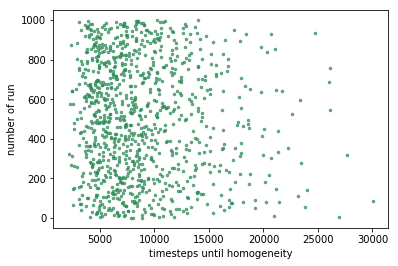

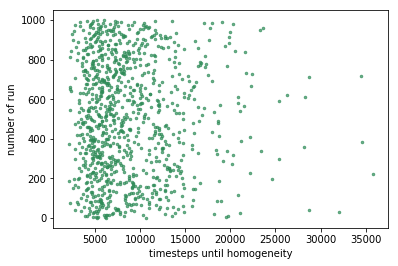

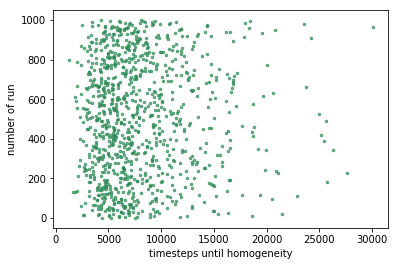

In [4]:
scatter_thom(thom01)
scatter_thom(thom45)
scatter_thom(thom90)

<IPython.core.display.Javascript object>


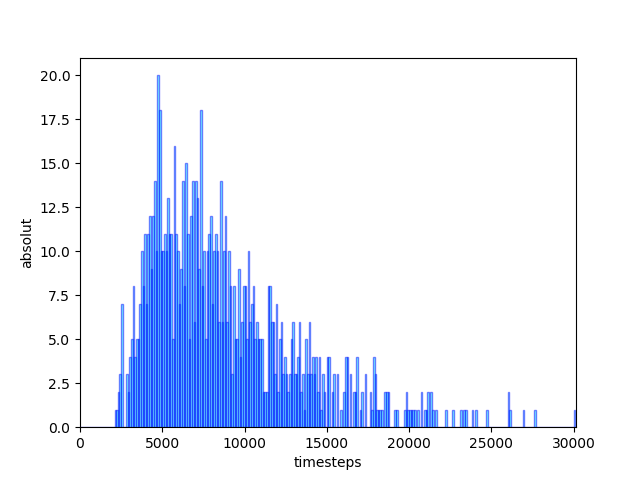

<IPython.core.display.Javascript object>


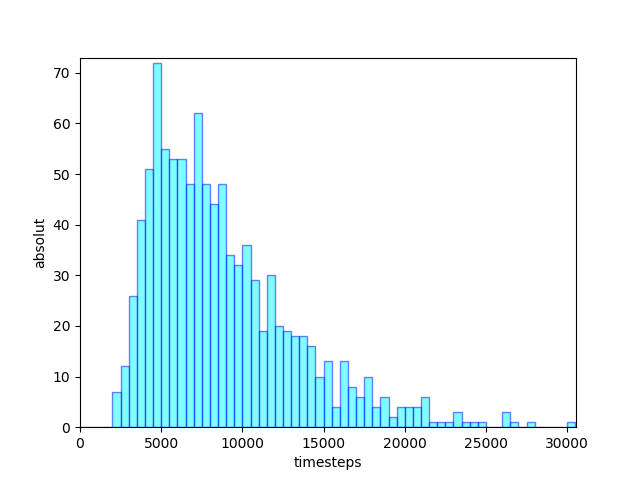

<IPython.core.display.Javascript object>


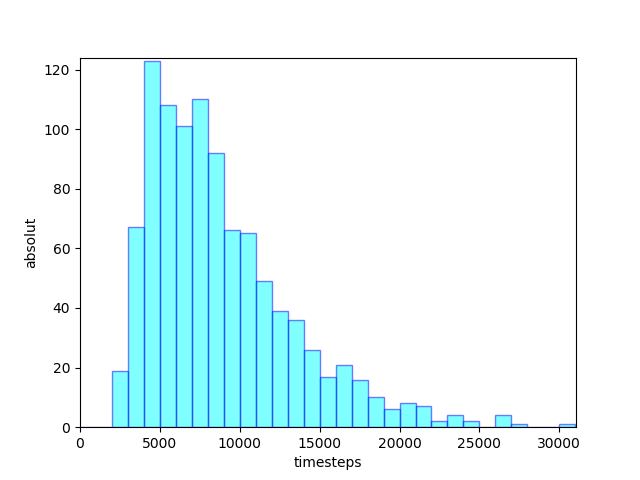

In [10]:
%matplotlib notebook
verteilung_bar(thom01, 100)
verteilung_bar(thom01, 500)
verteilung_bar(thom01, 1000)
# verteilung_bar(thom45, 500)
# verteilung_bar(thom90, 500)


<IPython.core.display.Javascript object>


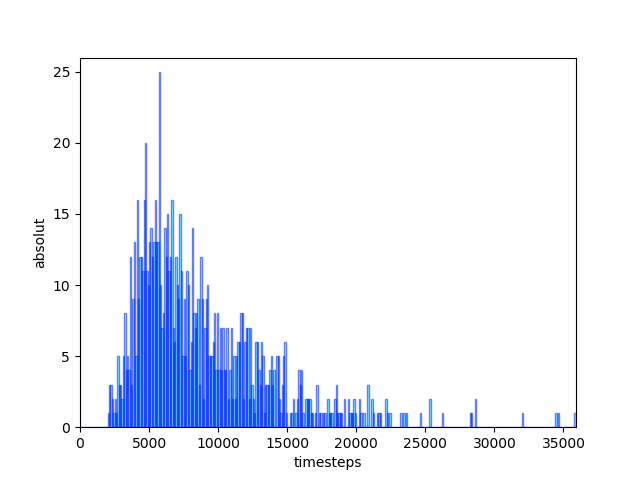

<IPython.core.display.Javascript object>


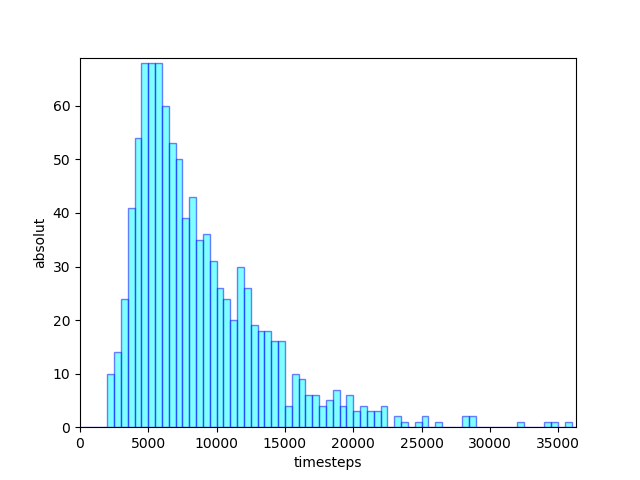

<IPython.core.display.Javascript object>


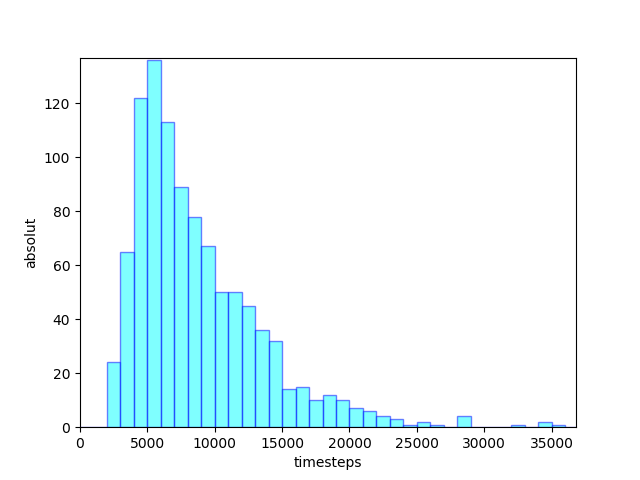

In [9]:
%matplotlib notebook
verteilung_bar(thom45, 100)
verteilung_bar(thom45, 500)
verteilung_bar(thom45, 1000)

<IPython.core.display.Javascript object>


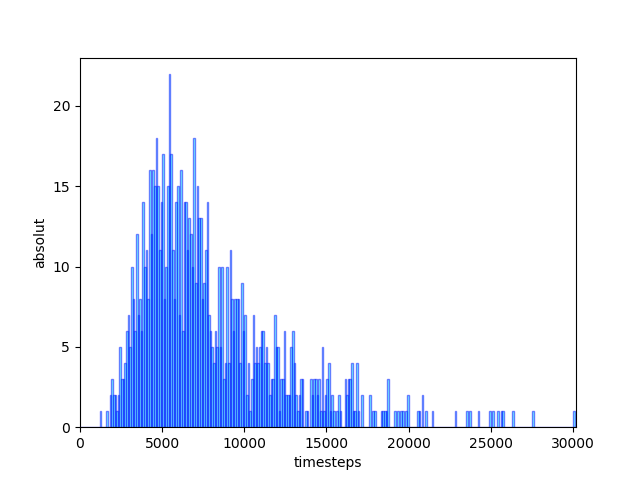

<IPython.core.display.Javascript object>


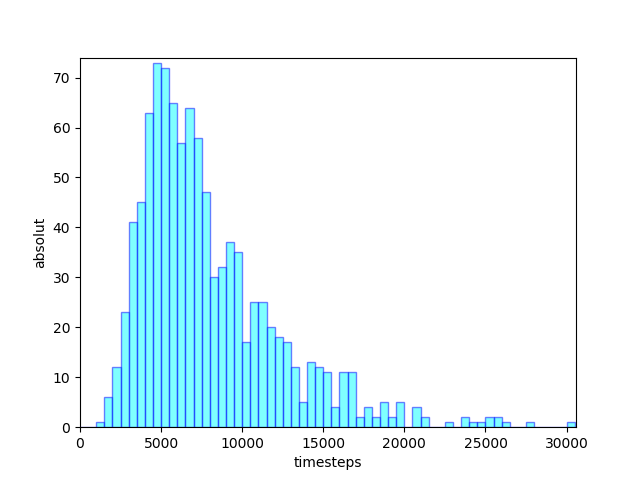

<IPython.core.display.Javascript object>


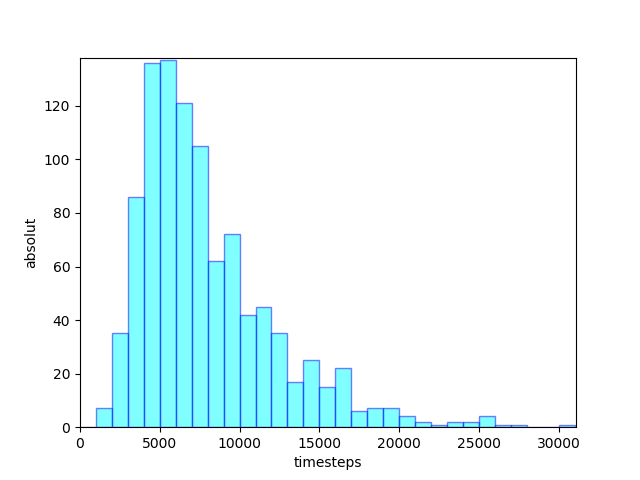

In [7]:
%matplotlib notebook
verteilung_bar(thom90, 100)
verteilung_bar(thom90, 500)
verteilung_bar(thom90, 1000)

In [8]:
print(thom01.max())

30045.0
